# **Machine Learning Project**
# **E-Commerce Sales Analysis and Customer Segmentation Using Machine Learning**

___

#### Problem Statment: *Price Optimization for E-Commerce Businesses Using Machine Learning.*
#### Dataset: *Electronics product sales data including price, rating, stock quantity, and sales details across multiple cities.*
#### Models Used: 
 - Linear Regression
 - Decision Tree
 - Random Forest
 - Support Vector Machine
 - Polynomial Features
 - Ridge Regreesion
 - Lasso Regression
 - K-Means
 - DESCAN
 - XGBoost
 - KNN
 - ARIMA
 - Prophet
___
___

In [ ]:
# import libaries 

# Basic required Libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Libs req. for suprevised learing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from  sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# Libs req. for unsuprevised learing
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Libs req. for time series forecasting
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
from prophet import Prophet

c:\Users\Dell\Desktop\data_projects\044(proj)\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\data_projects\044(proj)\datasets\ecommerce_product_dataset.csv", index_col = 'ProductID')
df.head()

,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
ProductID,,,,,,,,,,
1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


___
___

# **Basic Exploratory Data  Analysis**

In [3]:
df.shape

(1000, 10)

In [4]:
df.isnull().sum()

ProductName      0
Category         0
Price            0
Rating           0
NumReviews       0
StockQuantity    0
Discount         0
Sales            0
DateAdded        0
City             0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ProductName    1000 non-null   object 
 1   Category       1000 non-null   object 
 2   Price          1000 non-null   float64
 3   Rating         1000 non-null   float64
 4   NumReviews     1000 non-null   int64  
 5   StockQuantity  1000 non-null   int64  
 6   Discount       1000 non-null   float64
 7   Sales          1000 non-null   int64  
 8   DateAdded      1000 non-null   object 
 9   City           1000 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 85.9+ KB


In [7]:
round(df.describe(),2)

,Price,Rating,NumReviews,StockQuantity,Discount,Sales
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,253.78,3.03,2498.75,495.40,0.25,1011.04
std,141.40,1.15,1463.24,292.80,0.15,582.11
min,10.11,1.00,3.00,0.00,0.00,0.00
25%,133.09,2.10,1201.75,241.75,0.13,502.00
50%,251.31,3.10,2476.00,505.00,0.25,998.00
75%,375.83,4.00,3797.50,743.50,0.38,1540.00
max,499.74,5.00,4994.00,993.00,0.50,1997.00


The dataset shows that the average price is 253.78 with a significant spread (std: 141.40), most products have a rating around 3, and the median sales figure is 998, with a maximum of 1997, indicating variability in product performance and stock quantities.

In [8]:
df_int = df.select_dtypes(include=['int', 'float'])
round(df_int.corr(), 2)

,Price,Rating,NumReviews,StockQuantity,Discount,Sales
Price,1.00,-0.01,0.01,-0.01,-0.05,0.03
Rating,-0.01,1.00,-0.01,0.00,0.02,0.01
NumReviews,0.01,-0.01,1.00,-0.02,-0.02,0.06
StockQuantity,-0.01,0.00,-0.02,1.00,-0.01,-0.00
Discount,-0.05,0.02,-0.02,-0.01,1.00,0.03
Sales,0.03,0.01,0.06,-0.00,0.03,1.00


The correlation matrix indicates weak relationships between variables, with the highest correlation being between "NumReviews" and "Sales" (0.06). Other variables like "Price" and "Discount" show minimal or negative correlations with "Sales", suggesting that factors such as price or discount might not have a strong direct impact on sales within this dataset.

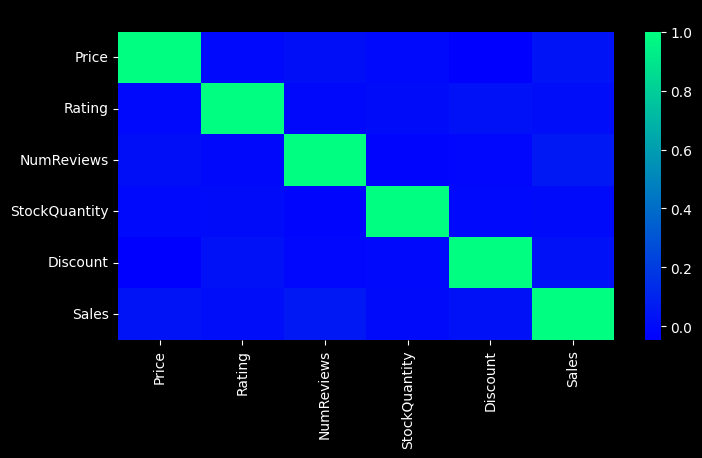

In [9]:
corr_matrix = df_int.corr()
plt.style.use('dark_background')
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, cmap='winter')
plt.title('Correlation Heatmap', color='black')
plt.show()

___
___

## **Basic Graphical Representation of Data**

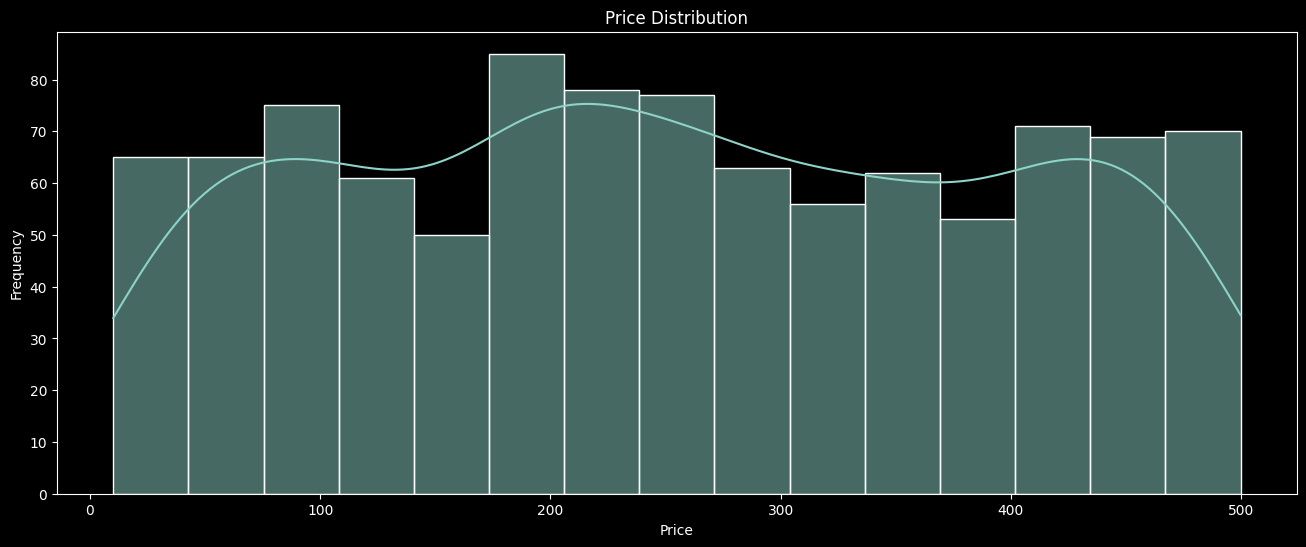

In [10]:
plt.figure(figsize=(16, 6))
sns.histplot(df['Price'], bins=15, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The histogram shows a right-skewed distribution of prices, with most prices concentrated in the lower range, indicating that a majority of products are priced lower.

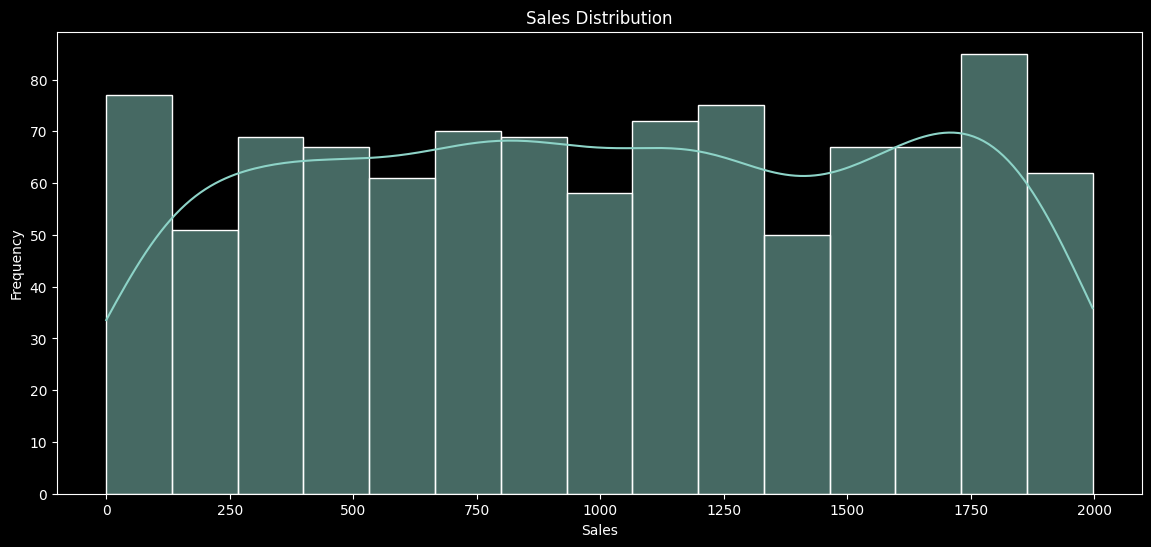

In [11]:
plt.figure(figsize=(14, 6))
sns.histplot(df['Sales'], bins=15, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

The histogram reveals a right-skewed distribution of sales, with most sales values clustered at the lower end, indicating that the majority of products have relatively low sales.

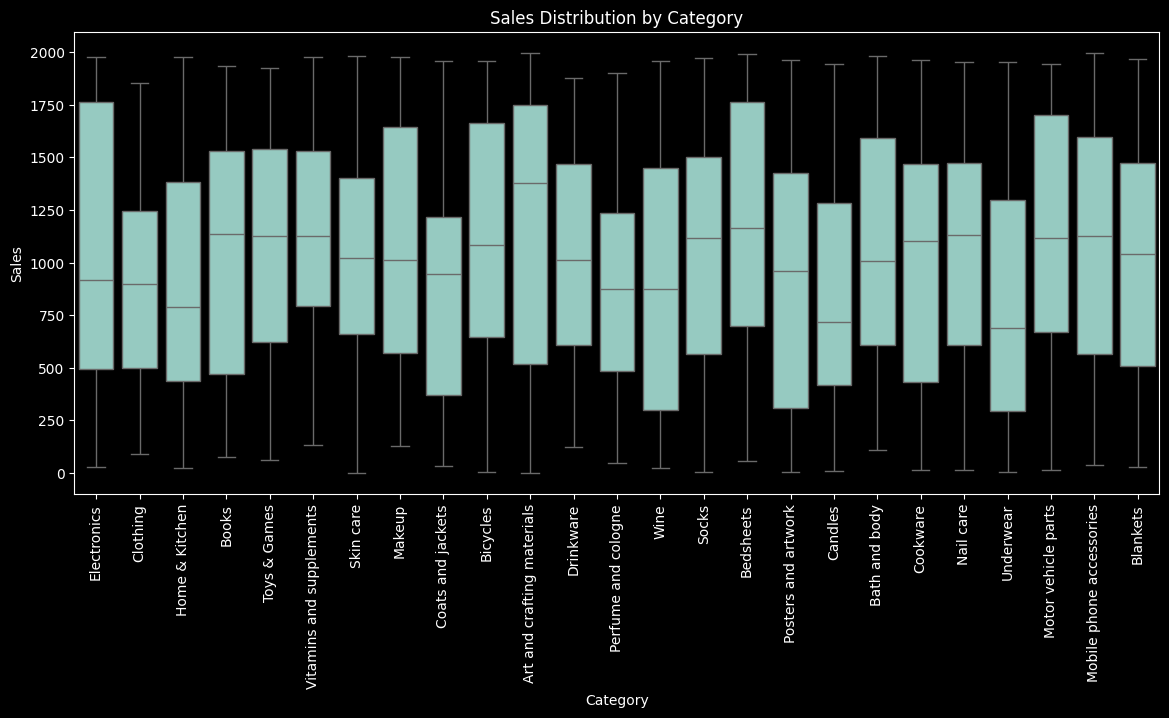

In [12]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales Distribution by Category')
plt.xticks(rotation=90)
plt.show()


The boxplot shows that sales vary significantly across categories, with some categories having higher sales and wider interquartile ranges, while others exhibit lower sales and less variability.

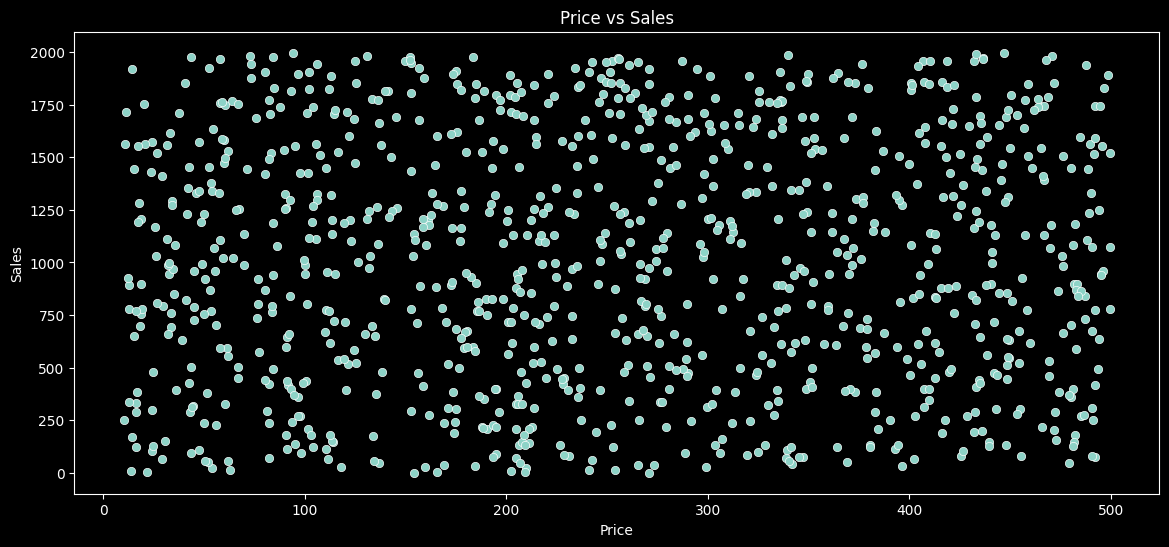

In [14]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Price', y='Sales', data=df)
plt.title('Price vs Sales')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.show()

The scatterplot indicates a slight negative correlation between price and sales, suggesting that as price increases, sales tend to decrease.

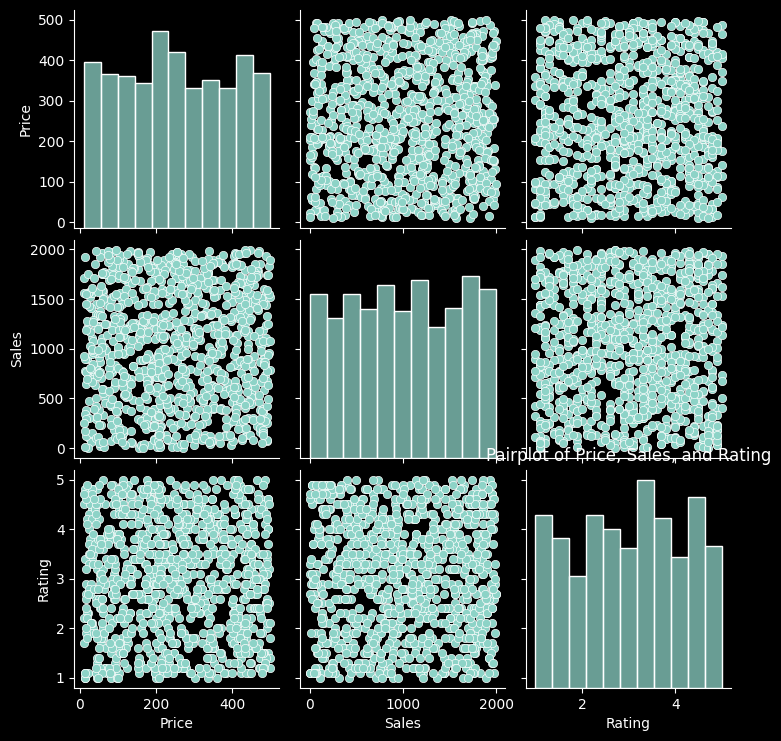

In [15]:
sns.pairplot(df[['Price', 'Sales', 'Rating']])
plt.title('Pairplot of Price, Sales, and Rating')
plt.show()

The pairplot shows the relationships between price, sales, and rating, revealing weak correlations between the variables, with no strong linear trends.

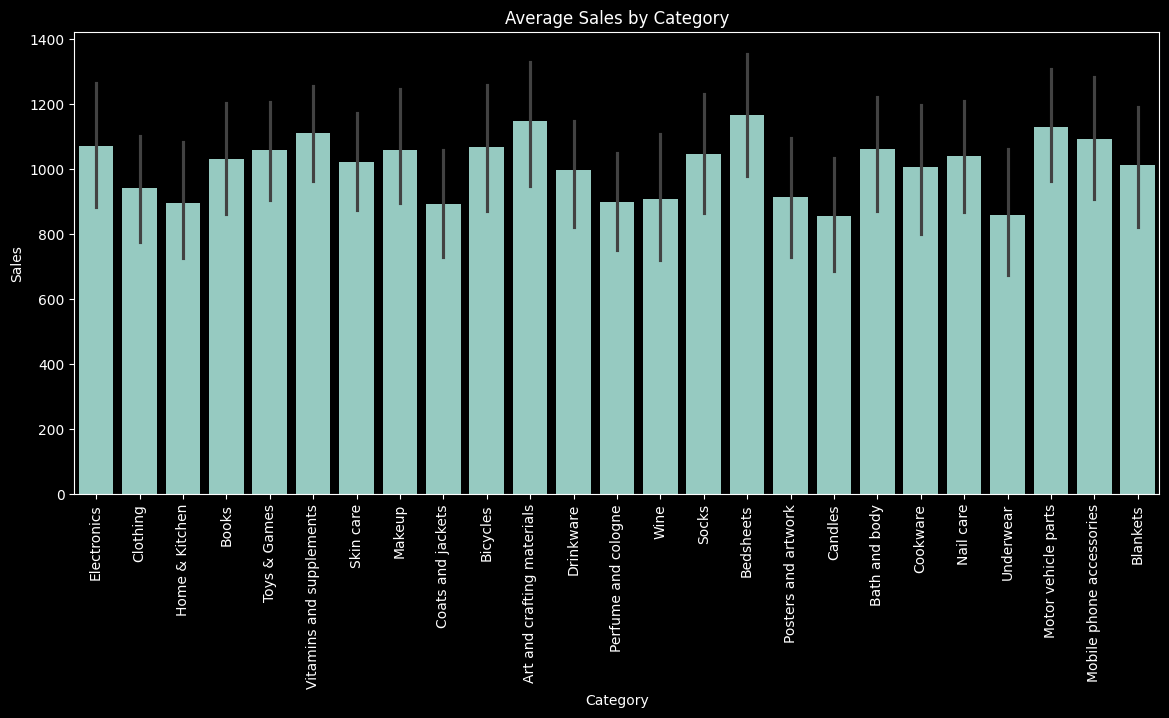

In [16]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Category', y='Sales', data=df, estimator='mean')
plt.title('Average Sales by Category')
plt.xticks(rotation=90)
plt.show()

The bar plot displays the average sales for each category, with some categories showing significantly higher average sales than others.

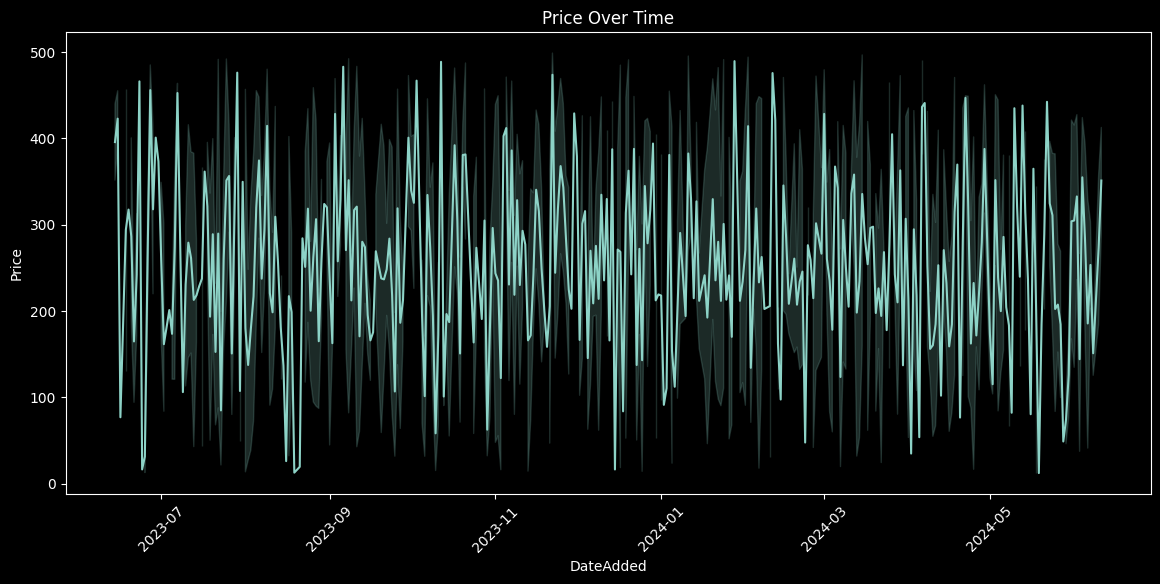

In [17]:
df['DateAdded'] = pd.to_datetime(df['DateAdded'])
df_sorted = df.sort_values('DateAdded')
plt.figure(figsize=(14, 6))
sns.lineplot(x='DateAdded', y='Price', data=df_sorted)
plt.title('Price Over Time')
plt.xticks(rotation=45)
plt.show()


The line plot shows the trend of prices over time, highlighting fluctuations and possible patterns in the pricing strategy.

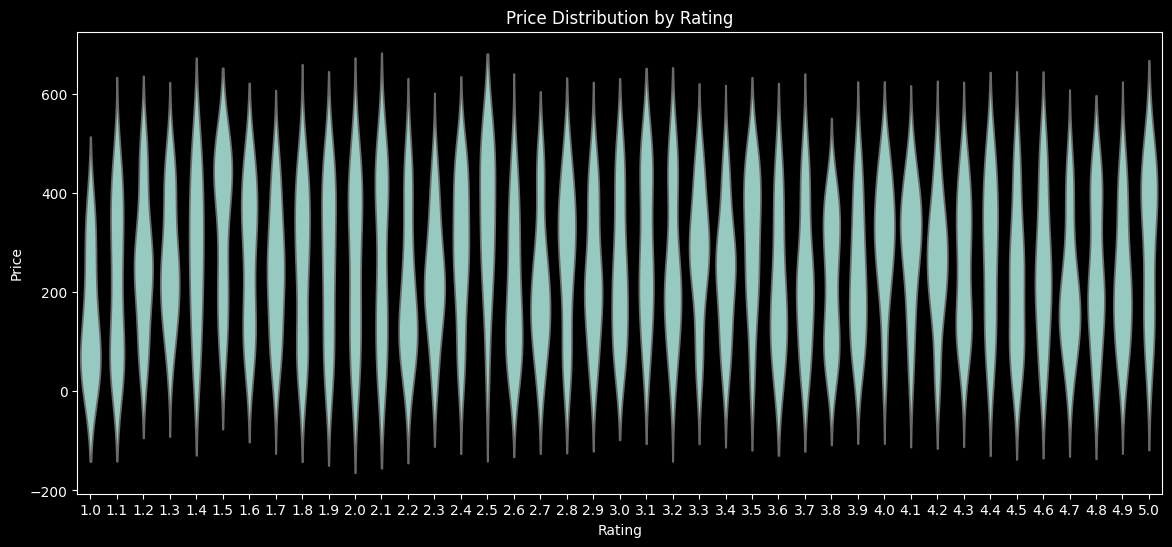

In [18]:
plt.figure(figsize=(14, 6))
sns.violinplot(x='Rating', y='Price', data=df, inner=None)
plt.title('Price Distribution by Rating')
plt.show()


The violin plot illustrates the distribution of prices across different ratings, showing how price ranges vary with ratings.

___
___

## **Working on Models**
### Using Supervised Machine Learning Alogrithms 
#### Regression Models used:
- Linear Regressoin
- Decision Tree
- Random Forest
- SVM
- Polynomial Regression
- Ridge Regression
___

# $Linear Regression$

In [19]:
df.head()

,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
ProductID,,,,,,,,,,
1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


In [20]:
x = df[['ProductName', 'Category', 'Rating', 'NumReviews', 'StockQuantity', 'Discount', 'Sales', 'City']]
x.head()

,ProductName,Category,Rating,NumReviews,StockQuantity,Discount,Sales,City
ProductID,,,,,,,,
1,Headphones,Electronics,1.7,3772,20,0.08,466,Albuquerque
2,Headphones,Electronics,2.3,2919,663,0.33,1332,Queens
3,Smartwatch,Electronics,1.8,1184,459,0.31,252,Austin
4,Smartphone,Electronics,3.4,2047,475,0.49,1806,Dallas
5,Laptop,Electronics,1.8,1267,831,0.23,1508,Tucson


In [21]:
categorical_columns = ['ProductName', 'Category', 'City']

label_encoder = LabelEncoder()

df1 = x.copy()

for column in categorical_columns:
    df1[column] = label_encoder.fit_transform(x[column])

x = df1

x.head()

,ProductName,Category,Rating,NumReviews,StockQuantity,Discount,Sales,City
ProductID,,,,,,,,
1,42,11,1.7,3772,20,0.08,466,2
2,42,11,2.3,2919,663,0.33,1332,75
3,80,11,1.8,1184,459,0.31,252,5
4,79,11,3.4,2047,475,0.49,1806,27
5,47,11,1.8,1267,831,0.23,1508,95


In [22]:
y = df['Price']
y.head()

ProductID
1    400.31
2    235.03
3    417.90
4    152.70
5    394.74
Name: Price, dtype: float64

In [23]:
print("Shape of x: ",x.shape,"\nShpae of y: ", y.shape)

Shape of x:  (1000, 8) 
Shpae of y:  (1000,)


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
print("x train shape: ", x_train.shape,"\nx test shape: ", x_test.shape, "\ny train shape: ", y_train.shape, "\ny test shape|: ", y_test.shape)

x train shape:  (700, 8) 
x test shape:  (300, 8) 
y train shape:  (700,) 
y test shape|:  (300,)


In [25]:
Linear_Regression = LinearRegression()

Linear_Regression.fit(x_train, y_train)

LinearRegression()

In [26]:
y_pred = Linear_Regression.predict(x_test)

# to see just first 10 predicted answers 
y_pred[:10]

array([280.84801475, 228.06064424, 252.44272477, 256.6588042 ,
       256.36271811, 265.42201184, 254.35529443, 250.25573643,
       247.78373507, 259.96087125])

In [27]:
Linear_Regression_mae = mean_absolute_error(y_test, y_pred)
Linear_Regression_mse = mean_squared_error(y_test, y_pred)
Linear_Regression_rmse = root_mean_squared_error(y_test, y_pred)
Linear_Regression_r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MAE: {Linear_Regression_mae:.2f}")
print(f"Linear Regression MSE: {Linear_Regression_mse:.2f}")
print(f"Linear Regression RMSE: {Linear_Regression_rmse:.2f}")
print(f"Linear Regression R²: {Linear_Regression_r2:.2f}")

Linear Regression MAE: 120.43
Linear Regression MSE: 19994.47
Linear Regression RMSE: 141.40
Linear Regression R²: -0.02


In [28]:
Linear_Regression.coef_

array([ 2.62668819e-01, -4.91179712e-01, -2.52660609e-01, -2.61663076e-04,
        1.02349805e-02, -6.95651828e+01,  7.32782819e-03,  1.70202341e-01])

In [29]:
pd.DataFrame(Linear_Regression.coef_, x.columns, columns=["Coedicients"])

,Coedicients
ProductName,0.262669
Category,-0.491180
Rating,-0.252661
NumReviews,-0.000262
StockQuantity,0.010235
Discount,-69.565183
Sales,0.007328
City,0.170202


In [30]:
Linear_Regression_Test_Residual = y_test - y_pred

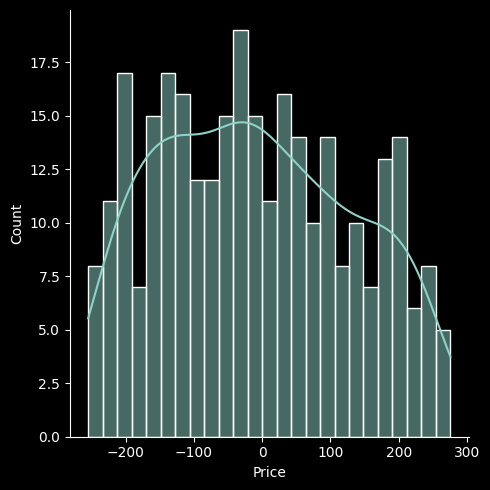

In [31]:
sns.displot(Linear_Regression_Test_Residual, bins = 25, kde = True)

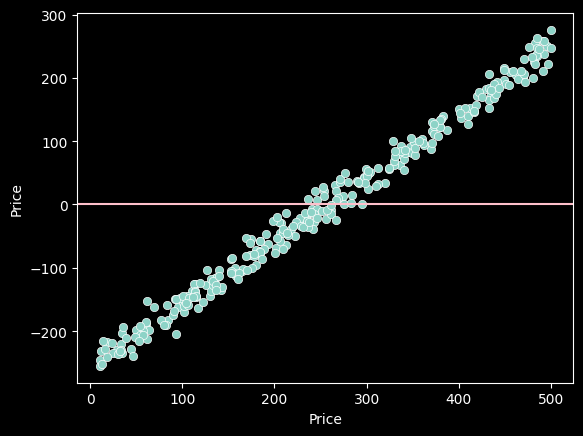

In [32]:
sns.scatterplot(x = y_test, y = Linear_Regression_Test_Residual)

plt.axhline(y = 0, color = 'pink', ls='-')

The distribution plot shows the residuals of the **Linear Regression model**, with the histogram displaying their frequency and the KDE highlighting the smooth distribution. The scatter plot visualizes the residuals against the actual test values (y_test), while the pink horizontal line at y=0 indicates the reference for perfect model predictions, helping assess model bias.

___

# $Decision Tree$

In [33]:
df.head()

,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
ProductID,,,,,,,,,,
1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


### By using same Independent x and Dependant y varibles 

In [34]:
x.head()

,ProductName,Category,Rating,NumReviews,StockQuantity,Discount,Sales,City
ProductID,,,,,,,,
1,42,11,1.7,3772,20,0.08,466,2
2,42,11,2.3,2919,663,0.33,1332,75
3,80,11,1.8,1184,459,0.31,252,5
4,79,11,3.4,2047,475,0.49,1806,27
5,47,11,1.8,1267,831,0.23,1508,95


In [35]:
y.head()

ProductID
1    400.31
2    235.03
3    417.90
4    152.70
5    394.74
Name: Price, dtype: float64

In [36]:
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size = 0.25, random_state = 101)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size= 0.25, random_state=101)


print("x temporary shape: ", x_temp.shape, "\nx valid shape: ", x_val.shape, "\ny temporary shape: ", y_temp.shape, "\ny valid shape: ", y_val.shape)
print("\nx train shape: ", x_train.shape, "\nx test shape: ", x_test.shape,  "\ny train shape: ", y_train.shape, "\ny test shape: ", y_test.shape)


x temporary shape:  (750, 8) 
x valid shape:  (188, 8) 
y temporary shape:  (750,) 
y valid shape:  (188,)

x train shape:  (562, 8) 
x test shape:  (250, 8) 
y train shape:  (562,) 
y test shape:  (250,)


In [37]:
Decision_Tree = DecisionTreeRegressor(random_state=101)
Decision_Tree.fit(x_train, y_train)

y_pred = Decision_Tree.predict(x_test)      
y_pred[:10]

array([139.67,  90.68, 316.35,  81.99, 284.44, 267.12, 279.61, 253.12,
       137.06, 228.9 ])

In [38]:
Decision_Tree_mae = mean_absolute_error(y_test, y_pred)
Decision_Tree_mse = mean_squared_error(y_test, y_pred)
Decision_Tree_rmse = root_mean_squared_error(y_test, y_pred)
Decision_Tree_r2 = r2_score(y_test, y_pred)

print(f"Decision Tree MAE: {Decision_Tree_mae:.2f}")
print(f"Decision Tree MSE: {Decision_Tree_mse:.2f}")
print(f"Decision Tree RMSE: {Decision_Tree_rmse:.2f}")
print(f"Decision Tree R²: {Decision_Tree_r2:.2f}")

Decision Tree MAE: 157.62
Decision Tree MSE: 38248.48
Decision Tree RMSE: 195.57
Decision Tree R²: -0.99


In [39]:
Decision_Tree_Test_Residual = y_test - y_pred

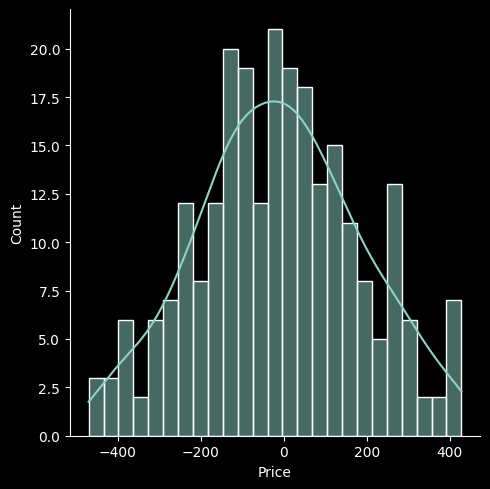

In [40]:
sns.displot(Decision_Tree_Test_Residual, bins = 25, kde = True)

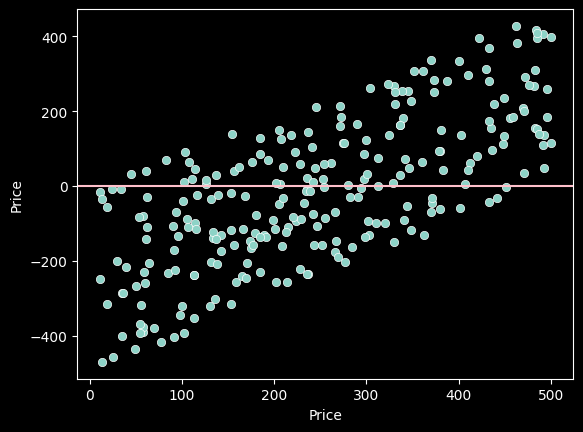

In [41]:
sns.scatterplot(x = y_test, y = Decision_Tree_Test_Residual)

plt.axhline(y = 0, color = 'pink', ls='-')

The distribution plot of the **Decision Tree model's** residuals shows their frequency and smoothness via the histogram and KDE. The scatter plot of the residuals against actual test values (y_test) helps visualize the model's deviations, with the pink horizontal line at y=0 acting as a reference for perfect predictions. The spread of residuals around zero indicates model performance.

___

# $Random Forest$

In [42]:
df.head()

,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
ProductID,,,,,,,,,,
1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


### By using same Independent x and Dependant y varibles 

In [43]:
x.head()

,ProductName,Category,Rating,NumReviews,StockQuantity,Discount,Sales,City
ProductID,,,,,,,,
1,42,11,1.7,3772,20,0.08,466,2
2,42,11,2.3,2919,663,0.33,1332,75
3,80,11,1.8,1184,459,0.31,252,5
4,79,11,3.4,2047,475,0.49,1806,27
5,47,11,1.8,1267,831,0.23,1508,95


In [44]:
y.head()

ProductID
1    400.31
2    235.03
3    417.90
4    152.70
5    394.74
Name: Price, dtype: float64

### By using same x_train & test and y_train & test

In [45]:
print("\nx train shape: ", x_train.shape, "\nx test shape: ", x_test.shape,  "\ny train shape: ", y_train.shape, "\ny test shape: ", y_test.shape)


x train shape:  (562, 8) 
x test shape:  (250, 8) 
y train shape:  (562,) 
y test shape:  (250,)


In [46]:
Random_Forest = RandomForestRegressor(random_state=101)

Random_Forest.fit(x_train, y_train)

y_pred = Random_Forest.predict(x_test)
y_pred[:10]

array([189.5879, 201.9786, 267.739 , 260.6053, 249.9996, 275.02  ,
       277.9669, 191.3136, 210.9242, 196.5152])

In [47]:
Random_Forest_mae = mean_absolute_error(y_test, y_pred)
Random_Forest_mse = mean_squared_error(y_test, y_pred)
Random_Forest_rmse = root_mean_squared_error(y_test, y_pred)
Random_Forest_r2 = r2_score(y_test, y_pred)

print(f"Random Forest MAE: {Random_Forest_mae:.2f}")
print(f"Random Forest MSE: {Random_Forest_mse:.2f}")
print(f"Random Forest RMSE: {Random_Forest_rmse:.2f}")
print(f"Random Forest R²: {Random_Forest_r2:.2f}")

Random Forest MAE: 122.80
Random Forest MSE: 21152.64
Random Forest RMSE: 145.44
Random Forest R²: -0.10


In [48]:
Random_Forest_Test_Residual = y_test - y_pred

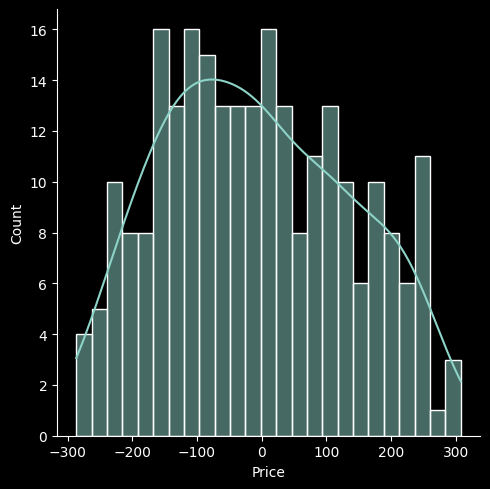

In [49]:
sns.displot(Random_Forest_Test_Residual, bins = 25, kde = True)

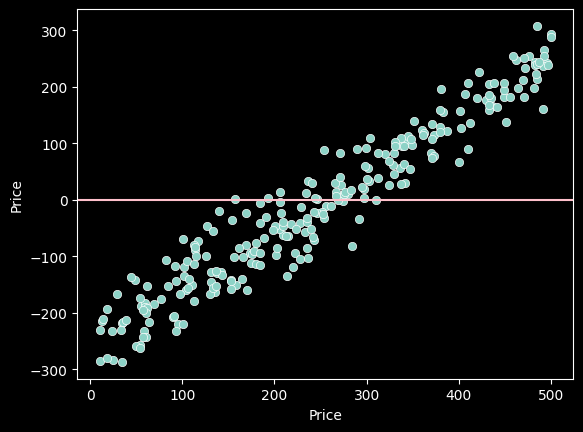

In [50]:
sns.scatterplot(x = y_test, y = Random_Forest_Test_Residual)

plt.axhline(y = 0, color = 'pink', ls='-')

The distribution plot of the **Random Forest model's** residuals provides insights into the frequency and smoothness of the errors, with the histogram and KDE showing how residuals are spread. The scatter plot of residuals against actual test values (y_test) shows the model's prediction errors. The pink horizontal line at y=0 represents the ideal scenario of no residuals, and the residuals' spread around zero indicates the accuracy of the model's predictions.

___

# $Support Vector Machine$

In [51]:
df.head()

,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
ProductID,,,,,,,,,,
1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


### By using same Independent x and Dependant y varibles 

In [52]:
x.head()

,ProductName,Category,Rating,NumReviews,StockQuantity,Discount,Sales,City
ProductID,,,,,,,,
1,42,11,1.7,3772,20,0.08,466,2
2,42,11,2.3,2919,663,0.33,1332,75
3,80,11,1.8,1184,459,0.31,252,5
4,79,11,3.4,2047,475,0.49,1806,27
5,47,11,1.8,1267,831,0.23,1508,95


In [53]:
y.head()

ProductID
1    400.31
2    235.03
3    417.90
4    152.70
5    394.74
Name: Price, dtype: float64

### By using same x_train & test and y_train & test

In [54]:
print("\nx train shape: ", x_train.shape, "\nx test shape: ", x_test.shape,  "\ny train shape: ", y_train.shape, "\ny test shape: ", y_test.shape)


x train shape:  (562, 8) 
x test shape:  (250, 8) 
y train shape:  (562,) 
y test shape:  (250,)


In [55]:
svm = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)
y_pred[:10]

array([256.58438366, 247.84416069, 255.35965662, 253.76605572,
       254.45310313, 247.84482205, 251.91575301, 254.52841882,
       247.15641762, 251.99015227])

In [56]:
SVM_mae = mean_absolute_error(y_test, y_pred)
SVM_mse = mean_squared_error(y_test, y_pred)
SVM_rmse = root_mean_squared_error(y_test, y_pred)
SVM_r2 = r2_score(y_test, y_pred)

print(f"SVM MAE: {SVM_mae:.2f}")
print(f"SVM MSE: {SVM_mse:.2f}")
print(f"SVM RMSE: {SVM_rmse:.2f}")
print(f"SVM R²: {SVM_r2:.2f}")

SVM MAE: 118.33
SVM MSE: 19321.73
SVM RMSE: 139.00
SVM R²: -0.00


In [57]:
SVM_Test_Residual = y_test - y_pred

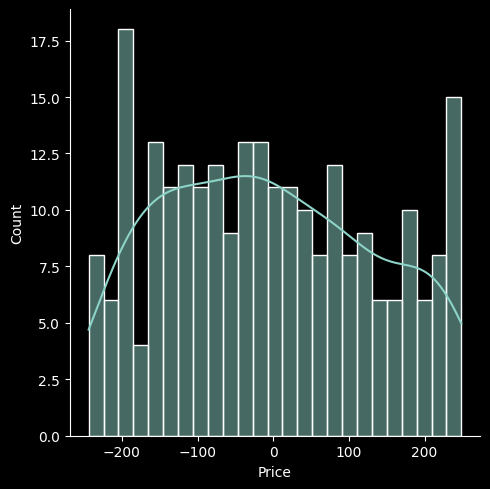

In [58]:
sns.displot(SVM_Test_Residual, bins = 25, kde = True)

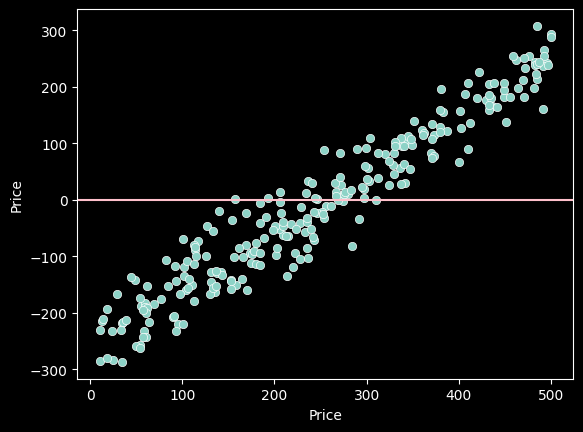

In [59]:
sns.scatterplot(x = y_test, y = Random_Forest_Test_Residual)

plt.axhline(y = 0, color = 'pink', ls='-')

The distribution plot of the SVM model's residuals shows how the errors are distributed, with the histogram and KDE providing a visual representation of the residuals' frequency and smoothness. The scatter plot of residuals versus actual values (y_test) reveals the prediction errors. The pink horizontal line at y=0 indicates the ideal residuals. However, the scatter plot incorrectly uses `Random_Forest_Test_Residual` instead of `SVM_Test_Residual`, which should be corrected to show the residuals for the SVM model.

____

# $Polynomial Regression$

In [60]:
df.head()

,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
ProductID,,,,,,,,,,
1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


### By using same Independent x and Dependant y varibles 

In [61]:
x.head()

,ProductName,Category,Rating,NumReviews,StockQuantity,Discount,Sales,City
ProductID,,,,,,,,
1,42,11,1.7,3772,20,0.08,466,2
2,42,11,2.3,2919,663,0.33,1332,75
3,80,11,1.8,1184,459,0.31,252,5
4,79,11,3.4,2047,475,0.49,1806,27
5,47,11,1.8,1267,831,0.23,1508,95


In [62]:
y.head()

ProductID
1    400.31
2    235.03
3    417.90
4    152.70
5    394.74
Name: Price, dtype: float64

### By using same x_train & test and y_train & test

In [63]:
print("\nx train shape: ", x_train.shape, "\nx test shape: ", x_test.shape,  "\ny train shape: ", y_train.shape, "\ny test shape: ", y_test.shape)


x train shape:  (562, 8) 
x test shape:  (250, 8) 
y train shape:  (562,) 
y test shape:  (250,)


In [64]:
poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(x_train)

In [65]:
poly_regressor = LinearRegression()
poly_regressor.fit(x_poly, y_train)

LinearRegression()

In [66]:
x_test_poly = poly.transform(x_test)
y_pred = poly_regressor.predict(x_test_poly)
y_pred[:10]

array([-38.51997536,  68.72991916, 321.51306938, 317.79455996,
       229.5357207 , 264.06571545, 226.09098365, 197.41866163,
       206.80108169, 176.78817319])

In [67]:
poly_regressor_mae = mean_absolute_error(y_test, y_pred)
poly_regressor_mse = mean_squared_error(y_test, y_pred)
poly_regressor_rmse = root_mean_squared_error(y_test, y_pred)
poly_regressor_r2 = r2_score(y_test, y_pred)

print(f"Polynomial Regression MAE: {poly_regressor_mae:.2f}")
print(f"Polynomial Regression MSE: {poly_regressor_mse:.2f}")
print(f"Polynomial Regression RMSE: {poly_regressor_rmse:.2f}")
print(f"Polynomial Regression R²: {poly_regressor_r2:.2f}")

Polynomial Regression MAE: 190.97
Polynomial Regression MSE: 60772.12
Polynomial Regression RMSE: 246.52
Polynomial Regression R²: -2.16


In [68]:
Poly_Regressor_Residual = y_test - y_pred

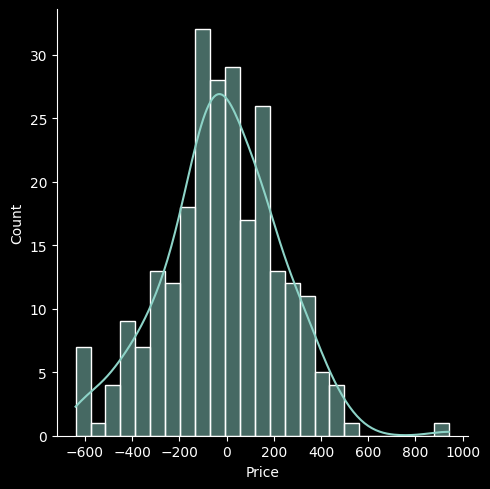

In [69]:
sns.displot(Poly_Regressor_Residual, bins = 25, kde = True)

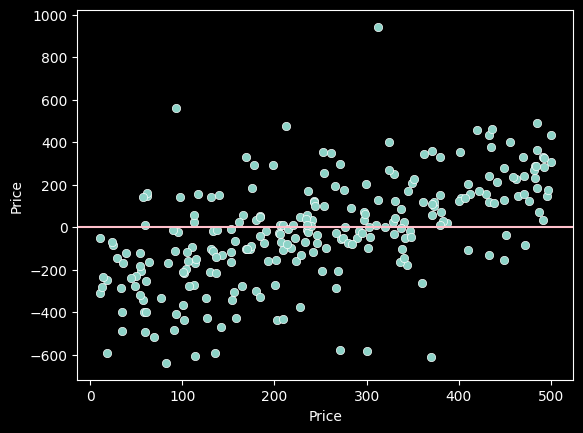

In [70]:
sns.scatterplot(x = y_test, y = Poly_Regressor_Residual)

plt.axhline(y = 0, color = 'pink', ls='-')

The distribution plot of the **Polynomial Regression model's** residuals shows how the errors are spread, with the histogram and KDE highlighting the frequency and smoothness of the residuals. The scatter plot of residuals versus actual values (y_test) demonstrates the error distribution, and the pink horizontal line at y=0 represents the ideal residuals, indicating perfect predictions. If the residuals are randomly scattered around the line, it suggests a well-fitting model.

___

# $Ridge Regression$

In [71]:
df.head()

,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
ProductID,,,,,,,,,,
1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


### By using same Independent x and Dependant y varibles 

In [72]:
x.head()

,ProductName,Category,Rating,NumReviews,StockQuantity,Discount,Sales,City
ProductID,,,,,,,,
1,42,11,1.7,3772,20,0.08,466,2
2,42,11,2.3,2919,663,0.33,1332,75
3,80,11,1.8,1184,459,0.31,252,5
4,79,11,3.4,2047,475,0.49,1806,27
5,47,11,1.8,1267,831,0.23,1508,95


In [73]:
y.head()

ProductID
1    400.31
2    235.03
3    417.90
4    152.70
5    394.74
Name: Price, dtype: float64

### By using same x_train & test and y_train & test

In [74]:
print("\nx train shape: ", x_train.shape, "\nx test shape: ", x_test.shape,  "\ny train shape: ", y_train.shape, "\ny test shape: ", y_test.shape)


x train shape:  (562, 8) 
x test shape:  (250, 8) 
y train shape:  (562,) 
y test shape:  (250,)


In [75]:
ridge_regressor = Ridge(alpha=1.0) 
ridge_regressor.fit(x_train, y_train)

Ridge()

In [76]:
y_pred = ridge_regressor.predict(x_test)
y_pred[:10]

array([288.74239049, 219.65526579, 256.30979196, 255.43843373,
       255.94266845, 260.17068688, 245.67289031, 248.82023752,
       246.64529934, 253.27137183])

In [77]:
ridge_regressor_mae = mean_absolute_error(y_test, y_pred)
ridge_regressor_mse = mean_squared_error(y_test, y_pred)
ridge_regressor_rmse = root_mean_squared_error(y_test, y_pred)
ridge_regressor_r2 = r2_score(y_test, y_pred)

print(f"Ridge Regression MAE: {ridge_regressor_mae:.2f}")
print(f"Ridge Regression MSE: {ridge_regressor_mse:.2f}")
print(f"Ridge Regression RMSE: {ridge_regressor_rmse:.2f}")
print(f"Ridge Regression R²: {ridge_regressor_r2:.2f}")

Ridge Regression MAE: 119.25
Ridge Regression MSE: 19613.98
Ridge Regression RMSE: 140.05
Ridge Regression R²: -0.02


In [78]:
Ridge_Test_Residual = y_test - y_pred

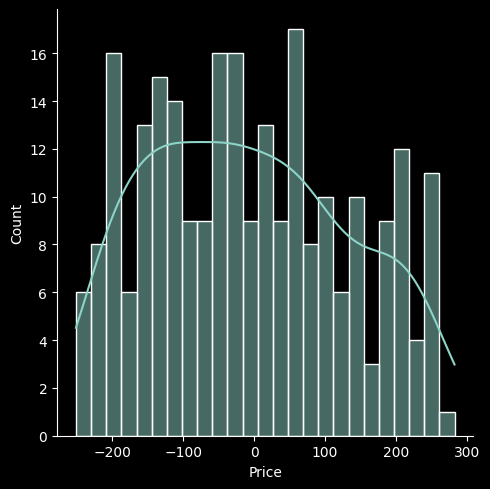

In [79]:
sns.displot(Ridge_Test_Residual, bins = 25, kde = True)

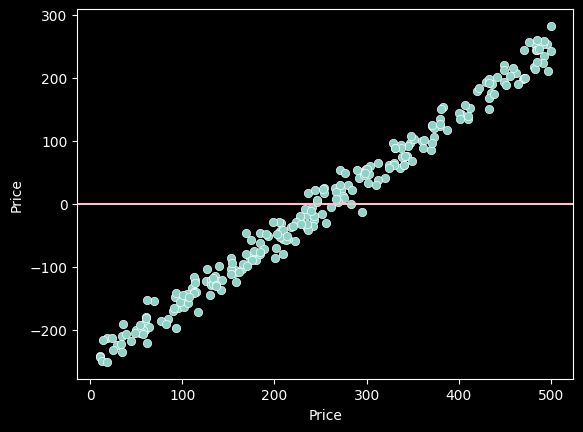

In [80]:
sns.scatterplot(x = y_test, y = Ridge_Test_Residual)

plt.axhline(y = 0, color = 'pink', ls='-')

The distribution plot of the **Ridge Regression model's** residuals illustrates the spread and frequency of prediction errors, with the KDE providing a smooth representation of the residual distribution. The scatter plot of residuals versus actual values (y_test) shows the relationship between the predicted and actual values, with the pink line at y=0 representing the ideal residuals. If the residuals are scattered evenly around this line, it indicates that the model has captured the underlying pattern well.

___

# $Lasso Regression$

In [81]:
df.head()

,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
ProductID,,,,,,,,,,
1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


### By using same Independent x and Dependant y varibles 

In [82]:
x.head()

,ProductName,Category,Rating,NumReviews,StockQuantity,Discount,Sales,City
ProductID,,,,,,,,
1,42,11,1.7,3772,20,0.08,466,2
2,42,11,2.3,2919,663,0.33,1332,75
3,80,11,1.8,1184,459,0.31,252,5
4,79,11,3.4,2047,475,0.49,1806,27
5,47,11,1.8,1267,831,0.23,1508,95


In [83]:
y.head()

ProductID
1    400.31
2    235.03
3    417.90
4    152.70
5    394.74
Name: Price, dtype: float64

### By using same x_train & test and y_train & test

In [84]:
print("\nx train shape: ", x_train.shape, "\nx test shape: ", x_test.shape,  "\ny train shape: ", y_train.shape, "\ny test shape: ", y_test.shape)


x train shape:  (562, 8) 
x test shape:  (250, 8) 
y train shape:  (562,) 
y test shape:  (250,)


In [85]:
lasso_regressor = Lasso(alpha=0.1)
lasso_regressor.fit(x_train, y_train)

Lasso(alpha=0.1)

In [86]:
y_pred = lasso_regressor.predict(x_test)
y_pred[:10]

array([289.15213915, 219.45500541, 256.21776616, 255.47267998,
       256.4165013 , 260.4199299 , 245.64494133, 248.39862652,
       246.62083536, 253.43671965])

In [87]:
lasso_regressor_mae = mean_absolute_error(y_test, y_pred)
lasso_regressor_mse = mean_squared_error(y_test, y_pred)
lasso_regressor_rmse = root_mean_squared_error(y_test, y_pred)
lasso_regressor_r2 = r2_score(y_test, y_pred)

print(f"Lasso Regression MAE: {lasso_regressor_mae:.2f}")
print(f"Lasso Regression MSE: {lasso_regressor_mse:.2f}")
print(f"Lasso Regression RMSE: {lasso_regressor_rmse:.2f}")
print(f"Lasso Regression R²: {lasso_regressor_r2:.2f}")

Lasso Regression MAE: 119.28
Lasso Regression MSE: 19621.94
Lasso Regression RMSE: 140.08
Lasso Regression R²: -0.02


In [88]:
Lasso_Test_Residual = y_test - y_pred

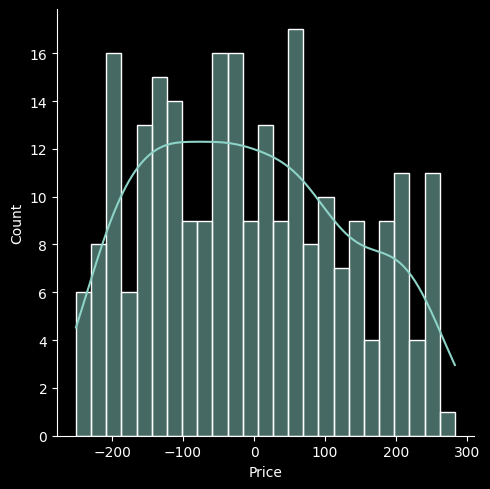

In [89]:
sns.displot(Lasso_Test_Residual, bins = 25, kde = True)

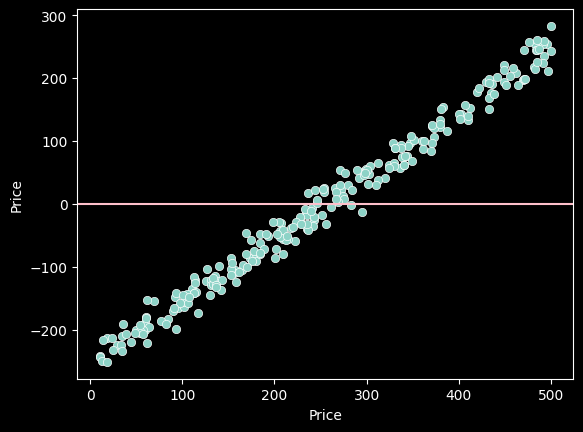

In [90]:
sns.scatterplot(x = y_test, y = Lasso_Test_Residual)

plt.axhline(y = 0, color = 'pink', ls='-')

The distribution plot of the Lasso Regression model's residuals shows the frequency and spread of prediction errors, with the KDE curve providing a smoothed view of the residual distribution. The scatter plot of residuals against the actual values (y_test) highlights how well the model's predictions align with the actual values, with the pink line at y=0 representing the ideal residuals. If the residuals are evenly distributed around the zero line, it indicates that the Lasso model has a relatively good fit.

___

## **`Comparison Chart`**

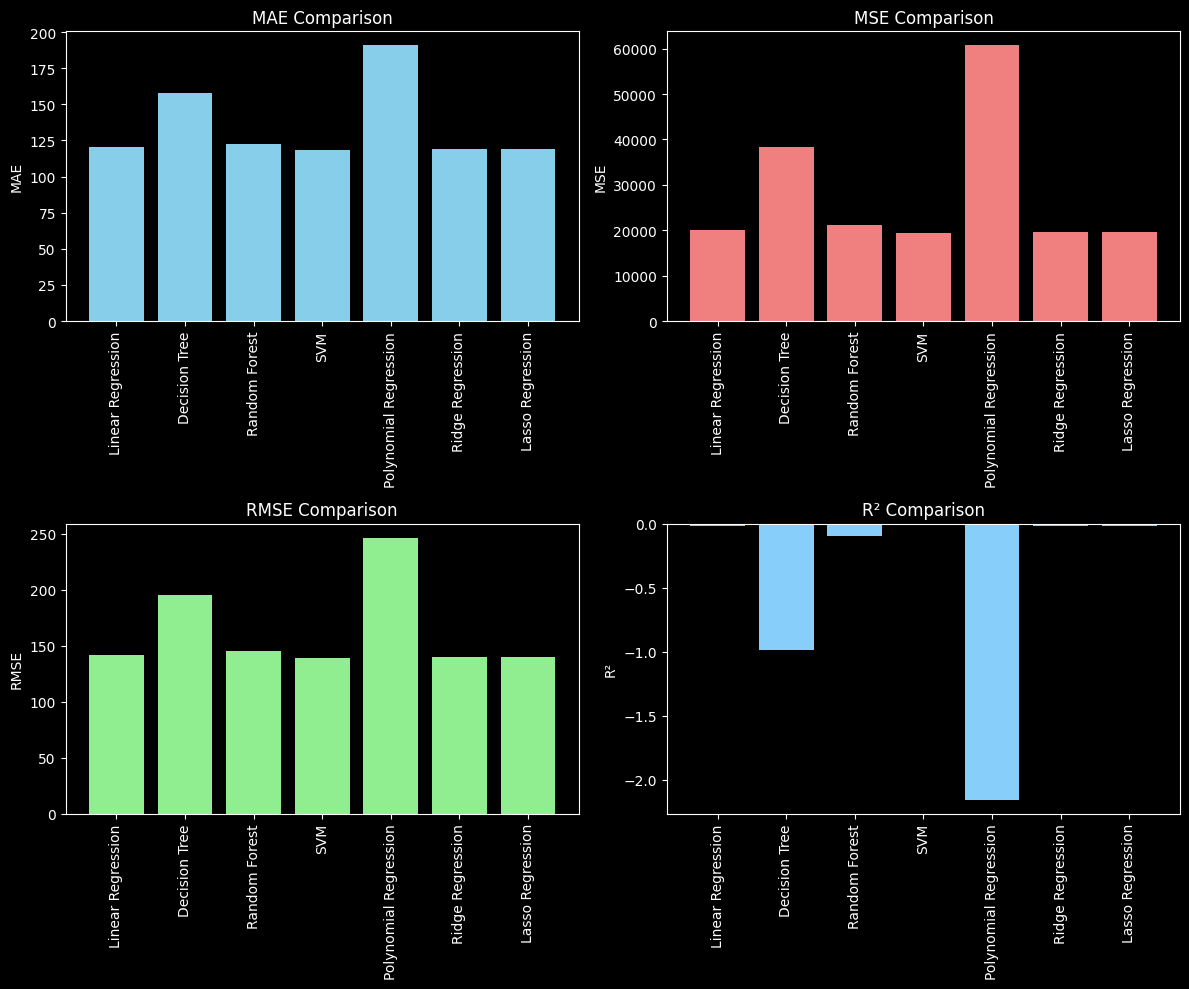

In [91]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression']

# Metric values for each model
mae = [Linear_Regression_mae, Decision_Tree_mae, Random_Forest_mae, SVM_mae, poly_regressor_mae, ridge_regressor_mae, lasso_regressor_mae]
mse = [Linear_Regression_mse, Decision_Tree_mse, Random_Forest_mse, SVM_mse, poly_regressor_mse, ridge_regressor_mse, lasso_regressor_mse]
rmse = [Linear_Regression_rmse, Decision_Tree_rmse, Random_Forest_rmse, SVM_rmse, poly_regressor_rmse, ridge_regressor_rmse, lasso_regressor_rmse]
r2 = [Linear_Regression_r2, Decision_Tree_r2, Random_Forest_r2, SVM_r2, poly_regressor_r2, ridge_regressor_r2, lasso_regressor_r2]


fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot for MAE
axes[0, 0].bar(models, mae, color='skyblue')
axes[0, 0].set_title('MAE Comparison')
axes[0, 0].set_ylabel('MAE')
axes[0, 0].tick_params(axis='x', rotation=90)

# Plot for MSE
axes[0, 1].bar(models, mse, color='lightcoral')
axes[0, 1].set_title('MSE Comparison')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].tick_params(axis='x', rotation=90)

# Plot for RMSE
axes[1, 0].bar(models, rmse, color='lightgreen')
axes[1, 0].set_title('RMSE Comparison')
axes[1, 0].set_ylabel('RMSE')
axes[1, 0].tick_params(axis='x', rotation=90)

# Plot for R²
axes[1, 1].bar(models, r2, color='lightskyblue')
axes[1, 1].set_title('R² Comparison')
axes[1, 1].set_ylabel('R²')
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


# Interpretation
The evaluation metrics for the models show that **Linear Regression** and **SVM** have the lowest **MAE (120.43 and 118.33 respectively)**, indicating better accuracy compared to others. **SVM** outperforms **Linear Regression** with slightly lower **MSE and RMSE**, though both models have poor **R² values close to zero**, `suggesting they don't fit the data well`. **Decision Tree** and **Polynomial Regression** show much higher **MAE** and **MSE values**, with **Polynomial Regression** performing particularly poorly **(R²: -2.16)**. **Random Forest** and **Lasso Regression** show `intermediate performance, but none of the models display strong predictive power`, as reflected by their **negative R² values**, indicating they all fail to improve over a simple mean-based model.

___
___
### Now Working with Unspurvised Machine Learning 
#### Clustring Models used:
- K-Means Clustering
- DBSCAN
- XGBoost
- KNN
___

In [92]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\data_projects\044(proj)\datasets\ecommerce_product_dataset.csv", index_col = 'ProductID')
df.head()

,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
ProductID,,,,,,,,,,
1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


In [93]:
x = df[['ProductName', 'Category', 'Rating', 'NumReviews', 'StockQuantity', 'Discount', 'Sales', 'City']]
x.head()

,ProductName,Category,Rating,NumReviews,StockQuantity,Discount,Sales,City
ProductID,,,,,,,,
1,Headphones,Electronics,1.7,3772,20,0.08,466,Albuquerque
2,Headphones,Electronics,2.3,2919,663,0.33,1332,Queens
3,Smartwatch,Electronics,1.8,1184,459,0.31,252,Austin
4,Smartphone,Electronics,3.4,2047,475,0.49,1806,Dallas
5,Laptop,Electronics,1.8,1267,831,0.23,1508,Tucson


In [94]:
categorical_columns = ['ProductName', 'Category', 'City']

label_encoder = LabelEncoder()

df1 = x.copy()

for column in categorical_columns:
    df1[column] = label_encoder.fit_transform(x[column])

x = df1

x.head()

,ProductName,Category,Rating,NumReviews,StockQuantity,Discount,Sales,City
ProductID,,,,,,,,
1,42,11,1.7,3772,20,0.08,466,2
2,42,11,2.3,2919,663,0.33,1332,75
3,80,11,1.8,1184,459,0.31,252,5
4,79,11,3.4,2047,475,0.49,1806,27
5,47,11,1.8,1267,831,0.23,1508,95


In [95]:
y = df['Price']
y.head()

ProductID
1    400.31
2    235.03
3    417.90
4    152.70
5    394.74
Name: Price, dtype: float64

# $K-Means$

In [96]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.23692882, -0.13867505, -1.15226678, ..., -1.17255345,
        -0.93677565, -1.63255154],
       [-0.23692882, -0.13867505, -0.63072177, ...,  0.53531396,
         0.55165122,  0.88229921],
       [ 1.05981542, -0.13867505, -1.06534261, ...,  0.39868457,
        -1.30458553, -1.5292015 ],
       ...,
       [ 1.36693906, -1.10940039, -0.19610093, ..., -1.58244163,
         0.48805792,  0.91674922],
       [ 1.57168815, -1.10940039, -1.49996346, ...,  0.60362866,
         1.63445598,  0.29664904],
       [ 1.36693906, -1.10940039, -0.89149428, ...,  0.87688744,
         0.13399795,  1.22679931]], shape=(1000, 8))

In [97]:
kmeans = KMeans(n_clusters=3, random_state=101)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=101)

In [98]:
y_kmeans = kmeans.predict(x_scaled)
y_kmeans[:10]

array([2, 1, 0, 1, 1, 1, 1, 2, 0, 0], dtype=int32)

In [99]:
x['Cluster'] = y_kmeans

In [100]:
print("Cluster Centroids:\n", kmeans.cluster_centers_)

Cluster Centroids:
 [[ 0.6820738   0.47027028  0.27937702 -0.48219615 -0.29886745  0.07758394
  -0.43022515  0.34457476]
 [-0.17166746 -0.13436594 -0.23072326  0.32445271  0.0463534   0.75859109
   0.55083554 -0.01155204]
 [-0.47248363 -0.30854145 -0.02093155  0.11550127  0.23809082 -0.89098893
  -0.1781593  -0.31957683]]


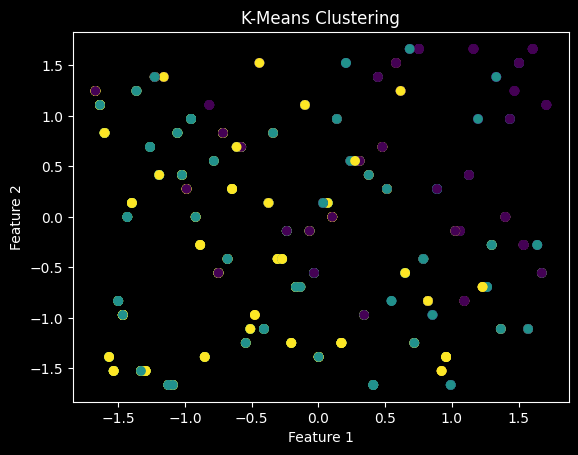

In [101]:
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=y_kmeans, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

The K-means clustering algorithm has divided the data into 3 clusters, as specified by the `n_clusters=3` parameter. The cluster centroids are the average positions of the points within each cluster, which can be used to understand the central tendency of the groups. The scatter plot visualizes the data points, colored by their assigned cluster, with distinct regions indicating how the data points are grouped based on their features. This clustering helps reveal underlying patterns or groupings within the data.

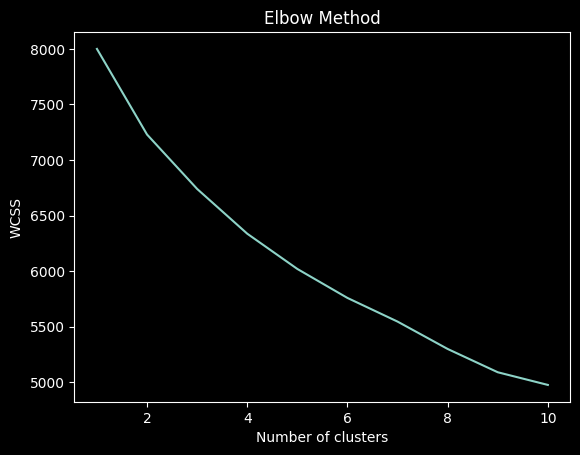

In [102]:
wcss = []
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, random_state=101)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_) 
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


The **Elbow Method** is used to determine the optimal number of clusters for the K-means algorithm. The plot shows the relationship between the number of clusters (x-axis) and the within-cluster sum of squares (WCSS, y-axis). The "elbow" point, where the WCSS begins to decrease at a slower rate, typically suggests the optimal number of clusters. From the plot, you should be able to identify the point where the curve flattens, which indicates the ideal number of clusters to use for K-means clustering.

____

# $DBSCAN$

In [103]:
df.head()

,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
ProductID,,,,,,,,,,
1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


### By using same Independent x and Dependant y varibles 

In [104]:
x.head()

,ProductName,Category,Rating,NumReviews,StockQuantity,Discount,Sales,City,Cluster
ProductID,,,,,,,,,
1,42,11,1.7,3772,20,0.08,466,2,2
2,42,11,2.3,2919,663,0.33,1332,75,1
3,80,11,1.8,1184,459,0.31,252,5,0
4,79,11,3.4,2047,475,0.49,1806,27,1
5,47,11,1.8,1267,831,0.23,1508,95,1


In [105]:
y.head()

ProductID
1    400.31
2    235.03
3    417.90
4    152.70
5    394.74
Name: Price, dtype: float64

In [106]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(x_scaled)
y_dbscan[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [107]:
x['Cluster'] = y_dbscan
print("Cluster Labels:\n", y_dbscan[:10])

Cluster Labels:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


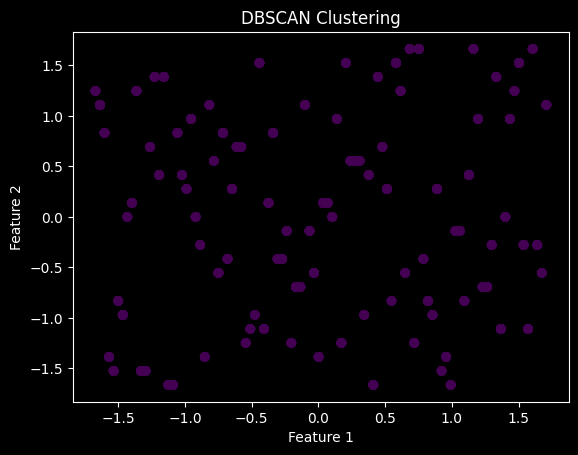

In [108]:
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=y_dbscan, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

The scatter plot represents the results of **DBSCAN (Density-Based Spatial Clustering of Applications with Noise) clustering**, where each point is color-coded according to its assigned cluster. In DBSCAN, clusters are formed based on the density of data points, with noise points (outliers) labeled as a distinct cluster (often colored differently). The plot shows the clustering of the data points, and areas of high density are grouped together, while sparse regions may be identified as noise or outliers.

___

# $XGBoost$

In [109]:
df.head()

,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
ProductID,,,,,,,,,,
1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


### By using same Independent x and Dependant y varibles 

In [110]:
x.head()

,ProductName,Category,Rating,NumReviews,StockQuantity,Discount,Sales,City,Cluster
ProductID,,,,,,,,,
1,42,11,1.7,3772,20,0.08,466,2,-1
2,42,11,2.3,2919,663,0.33,1332,75,-1
3,80,11,1.8,1184,459,0.31,252,5,-1
4,79,11,3.4,2047,475,0.49,1806,27,-1
5,47,11,1.8,1267,831,0.23,1508,95,-1


In [111]:
y.head()

ProductID
1    400.31
2    235.03
3    417.90
4    152.70
5    394.74
Name: Price, dtype: float64

In [112]:
xgb = XGBRegressor(random_state=101)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=101, ...)

In [113]:
y_pred = xgb.predict(x_test)
y_pred[:10]

array([ 92.10811,  83.36348, 230.0997 , 244.2367 , 128.75844, 275.42166,
       306.5692 , 277.90363, 156.29059, 214.5452 ], dtype=float32)

In [114]:
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_rmse = root_mean_squared_error(y_test, y_pred)
xgb_r2 = r2_score(y_test, y_pred)

print(f"XGBoost MAE: {xgb_mae:.2f}")
print(f"XGBoost MSE: {xgb_mse:.2f}")
print(f"XGBoost RMSE: {xgb_rmse:.2f}")
print(f"XGBoost R²: {xgb_r2:.2f}")

XGBoost MAE: 131.02
XGBoost MSE: 24760.28
XGBoost RMSE: 157.35
XGBoost R²: -0.29


___

# $KNN$

In [115]:
df.head()

,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
ProductID,,,,,,,,,,
1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


In [116]:
x.head()

,ProductName,Category,Rating,NumReviews,StockQuantity,Discount,Sales,City,Cluster
ProductID,,,,,,,,,
1,42,11,1.7,3772,20,0.08,466,2,-1
2,42,11,2.3,2919,663,0.33,1332,75,-1
3,80,11,1.8,1184,459,0.31,252,5,-1
4,79,11,3.4,2047,475,0.49,1806,27,-1
5,47,11,1.8,1267,831,0.23,1508,95,-1


In [117]:
y.head()

ProductID
1    400.31
2    235.03
3    417.90
4    152.70
5    394.74
Name: Price, dtype: float64

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [119]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [120]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train_scaled, y_train)

KNeighborsRegressor()

In [121]:
y_pred = knn.predict(x_test_scaled)
y_pred[:10]

array([103.704, 286.806, 291.718, 282.306, 194.43 , 229.73 , 353.426,
       305.672, 261.266, 269.756])

In [122]:
KNN_mae = mean_absolute_error(y_test, y_pred)
KNN_mse = mean_squared_error(y_test, y_pred)
KNN_rmse = root_mean_squared_error(y_test, y_pred)
KNN_r2 = r2_score(y_test, y_pred)

print(f"KNN MAE: {KNN_mae:.2f}")
print(f"KNN MSE: {KNN_mse:.2f}")
print(f"KNN RMSE: {KNN_rmse:.2f}")
print(f"KNN R²: {KNN_r2:.2f}")

KNN MAE: 132.27
KNN MSE: 24218.76
KNN RMSE: 155.62
KNN R²: -0.26


___

## **`Comparison Chart`**

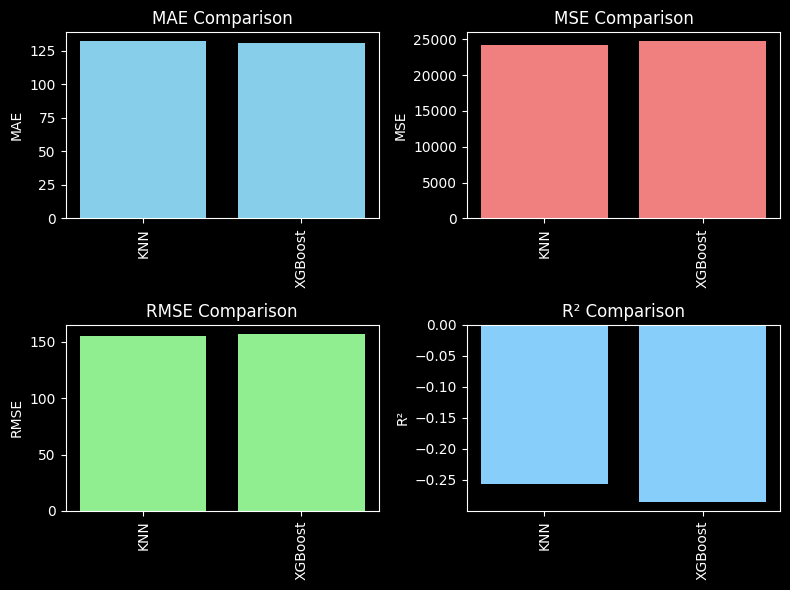

In [123]:
models = ['KNN', 'XGBoost']

# Metric values for each model
mae = [KNN_mae, xgb_mae]
mse = [KNN_mse, xgb_mse]
rmse = [KNN_rmse, xgb_rmse]
r2 = [KNN_r2, xgb_r2]

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
# Function to annotate bars with model names inside

# Plot for MAE
axes[0, 0].bar(models, mae, color='skyblue')
axes[0, 0].set_title('MAE Comparison')
axes[0, 0].set_ylabel('MAE')
axes[0, 0].tick_params(axis='x', rotation=90)

# Plot for MSE
axes[0, 1].bar(models, mse, color='lightcoral')
axes[0, 1].set_title('MSE Comparison')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].tick_params(axis='x', rotation=90)

# Plot for RMSE
axes[1, 0].bar(models, rmse, color='lightgreen')
axes[1, 0].set_title('RMSE Comparison')
axes[1, 0].set_ylabel('RMSE')
axes[1, 0].tick_params(axis='x', rotation=90)

# Plot for R²
axes[1, 1].bar(models, r2, color='lightskyblue')
axes[1, 1].set_title('R² Comparison')
axes[1, 1].set_ylabel('R²')
axes[1, 1].tick_params(axis='x', rotation=90)


plt.tight_layout()
plt.show()

# Interpretaion:
The evaluation metrics for both **XGBoost** and **KNN models** indicate that both models are performing similarly in predicting price. *The Mean Absolute Error (MAE)* for **XGBoost is 131.02**, slightly better than **KNN's 132.27**, suggesting XGBoost has a marginally better average error. However, both models show high *Mean Squared Error (MSE)* and *Root Mean Squared Error (RMSE)*, indicating significant prediction deviations. The negative *R² values*   **(-0.29 for XGBoost and -0.26 for KNN)** suggest that both models are underperforming compared to a simple mean-based model, indicating a poor fit to the data.

___
___
### Now Working with Time Series Forecasting 
#### Time Series Models used:
- ARIMA
- Prophet
___

In [124]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\data_projects\044(proj)\datasets\ecommerce_product_dataset.csv", index_col = 'ProductID')
df.head()

,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
ProductID,,,,,,,,,,
1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


In [125]:
register_matplotlib_converters()

In [126]:
df.set_index('DateAdded', inplace=True)
df.head()

,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,City
DateAdded,,,,,,,,,
2023-11-10,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,Albuquerque
2023-09-28,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,Queens
2023-10-20,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,Austin
2023-12-05,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,Dallas
2023-08-10,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,Tucson


In [127]:
df.sort_index(inplace=True)
df.head()

,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,City
DateAdded,,,,,,,,,
2023-06-14,Sparkling Wine,Wine,351.66,4.0,504,597,0.42,498,Spokane
2023-06-14,Lipstick,Makeup,439.80,2.7,361,185,0.00,128,Mesa
2023-06-15,Winter Coat,Coats and jackets,390.59,1.3,1719,618,0.03,249,Rochester
2023-06-15,Biography,Books,455.14,3.3,4807,22,0.23,301,San Francisco
2023-06-16,Cuticle Oil,Nail care,76.82,3.9,4564,211,0.13,803,Tulsa


In [128]:
df['Predicted_Price'] = df['Price'] * np.random.uniform(0.95, 1.05, size=len(df))

In [129]:
fig = px.line(df, x=df.index, y=['Price', 'Predicted_Price'], title='Price Over Time (Actual vs Predicted)')

# Customize line colors for actual and predicted
fig.update_traces(line=dict(color='yellow'), selector=dict(name='Price'))
fig.update_traces(line=dict(color='red'), selector=dict(name='Predicted_Price'))

# Add range slider and update x-axis range (zoom into the last week by default)
fig.update_layout(
    xaxis_rangeslider_visible=True,
    xaxis=dict(type='date', range=[df.index[-7], df.index[-1]]),  # Default zoom to the last week
    autosize=True
)

# Display the plot in the browser
fig.show(renderer="browser")

# $Prophet$

In [130]:
df.head()

,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,City,Predicted_Price
DateAdded,,,,,,,,,,
2023-06-14,Sparkling Wine,Wine,351.66,4.0,504,597,0.42,498,Spokane,359.865845
2023-06-14,Lipstick,Makeup,439.80,2.7,361,185,0.00,128,Mesa,440.389698
2023-06-15,Winter Coat,Coats and jackets,390.59,1.3,1719,618,0.03,249,Rochester,403.724496
2023-06-15,Biography,Books,455.14,3.3,4807,22,0.23,301,San Francisco,458.887447
2023-06-16,Cuticle Oil,Nail care,76.82,3.9,4564,211,0.13,803,Tulsa,75.518304


In [131]:
df.reset_index(inplace= True)

In [132]:
df.head()

,DateAdded,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,City,Predicted_Price
0,2023-06-14,Sparkling Wine,Wine,351.66,4.0,504,597,0.42,498,Spokane,359.865845
1,2023-06-14,Lipstick,Makeup,439.80,2.7,361,185,0.00,128,Mesa,440.389698
2,2023-06-15,Winter Coat,Coats and jackets,390.59,1.3,1719,618,0.03,249,Rochester,403.724496
3,2023-06-15,Biography,Books,455.14,3.3,4807,22,0.23,301,San Francisco,458.887447
4,2023-06-16,Cuticle Oil,Nail care,76.82,3.9,4564,211,0.13,803,Tulsa,75.518304


In [133]:
df_prophet = df[['DateAdded', 'Price']].rename(columns={'DateAdded': 'ds', 'Price': 'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

In [134]:
model = Prophet()
model.fit(df_prophet)

23:31:16 - cmdstanpy - INFO - Chain [1] start processing
23:31:17 - cmdstanpy - INFO - Chain [1] done processing


In [135]:
future = model.make_future_dataframe(30)

# Make predictions
forecast = model.predict(future)

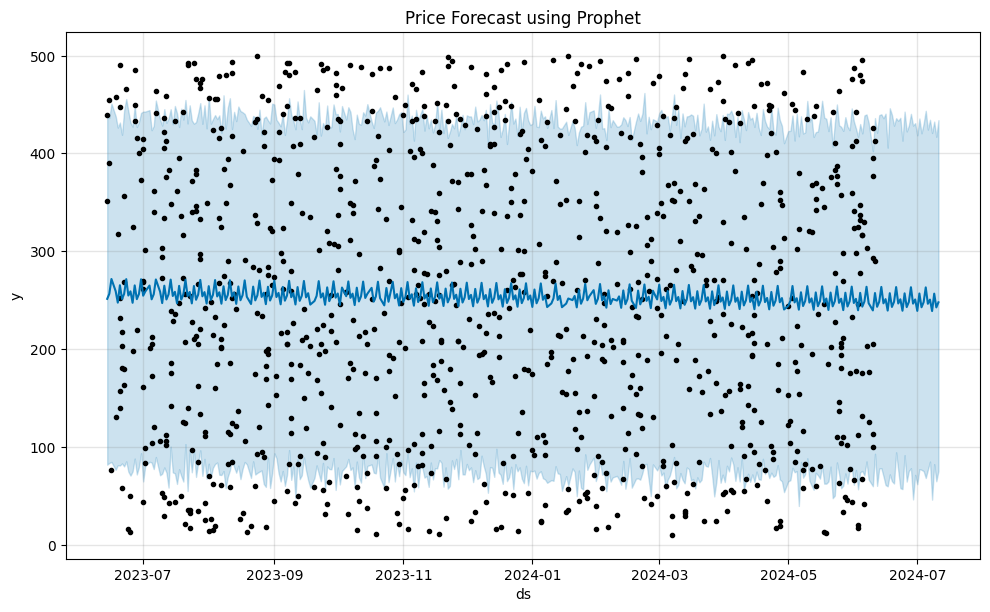

In [136]:
plt.style.use('default')
model.plot(forecast)
plt.title('Price Forecast using Prophet')
plt.show()

The plot shows the price forecast using the **Prophet model**, displaying the predicted prices over time. The forecasted values are shown with a shaded confidence interval, indicating the expected range of prices. This visualization helps to assess the accuracy of the model and its ability to capture trends, seasonal patterns, and uncertainties in the price data.

# The End
___
___
___